# VCP Tutorial
This is a tutorial that walks you through how to run the voltage clamp protocol (VCP) from *"An in silico-in vitro pipeline for drug cardiotoxicity screening identifies ionic proarrhthmia mechanisms"* by Alexander P. Clark, Siyu Wei, Darshan Kalola, Trine Krogh-Madsen, and David J. Christini. 

1. **Import functions and data.**  To run the voltage clamp protocol we can use the "get_vc_artifact_response" function in the "functions.py" script. We will also need numpy, pandas, and matplotlib to process and plot the voltage clamp protocol data. Lastly, we will load in the "all_cells.csv" file which contains time, voltage, and current information from 39 iPSC-CMs collected in vitro at baseline. The file "all_cells.csv" was created to contains all necissary data for this repo but the original files could be downloaded from: https://ecommons.cornell.edu/items/783662dd-1b71-4844-bffb-6811cede3bc9 

In [8]:
# IMPORT FUNCTIONS
from functions import get_vc_artifact_response

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# IMPORT DATA
all_cells = pd.read_csv('./all_cells.csv.bz2')


2. **Run the VCP on the Paci and Kernik Models.** The "get_vc_artifact_response" function has a few arguments. We first pass in the model we are interested in using (i.e. "Kernik" or "Paci"), and then any parameters we want to change in the model. In order to manipulate parameters we have to pass in a dictonary that includes information on what equation to manipulate and the value. Below you can see that we would like to change the capacitance to 50pF. In the Kernik model the capacitace equation is named "Cm" and we can find it in the [geom] section of the model ('./models/kernik_artifact_fixed.mmt'); therefore, we set the string "geom.Cm" equal to 50. This is done for every parameter we would like to change. 

The models used here incorperate artifact equations to better simulate what is seen experimentally. The paci and kernik models in the "models" folder include a set of equations for running voltage clamp experiments so a specific set of parameters were fit to acquire data in voltage clamp mode. To collect action potential data, we would need to use a different model since current clamp mode requires different equations and parameters (not included in this repo). 

Here we set the seal resistance to 2 GigaOhms, the cell capacitance to 50 pF (centrally located in the range of capacitances for the experimental data he collected), and the following experimental artifacts: liquid junction potential offset (-2.8 mV), access resistance (20 Mohms), and series resistance compensation of 70%, including supercharging. 

In [5]:
# Run VCP

# Kernik Model
all_vc_params_kernik = {'voltageclamp.gLeak':0.5, 'geom.Cm':50, 'voltageclamp.cm_est':50, 'voltageclamp.rseries':0.02, 'voltageclamp.rseries_est':0.02}
t_kernik_vcp, i_out_kernik, v_kernik_vcp = get_vc_artifact_response('Kernik', all_vc_params_kernik)

# Paci Model
all_vc_params_paci = {'voltageclamp.gLeak':0.5, 'cell.Cm':50, 'voltageclamp.cm_est':50, 'voltageclamp.rseries':0.02, 'voltageclamp.rseries_est':0.02}
t_paci_vcp, i_out_paci, v_paci_vcp = get_vc_artifact_response('Paci', all_vc_params_paci)

3. **Plot the VCP Data.** Below lets plot the vcp and current data we just collected and the experimental data to see how they compare!

Text(0, 0.5, 'Voltage (mV)')

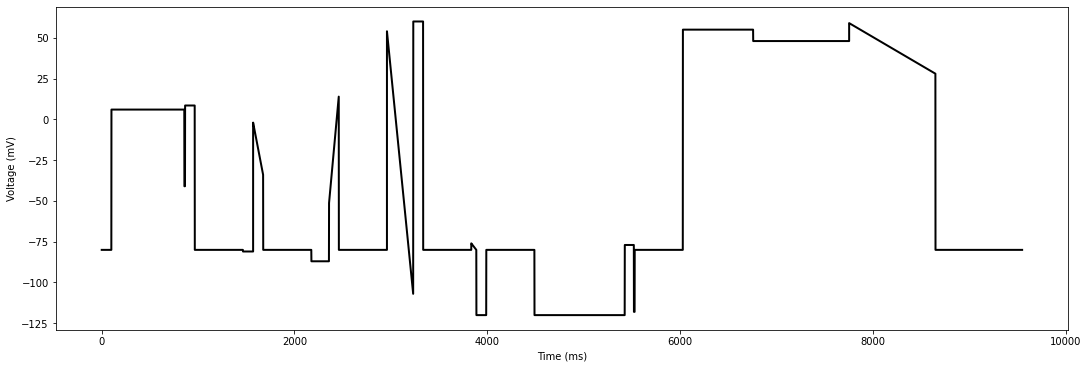

In [13]:
# Plot VCP
fig, axs = plt.subplots(1, figsize = (15, 5), constrained_layout = True)

axs.plot(t_kernik_vcp, v_kernik_vcp, color = 'black', alpha = 1, linewidth = 2)

axs.set_xlabel('Time (ms)')
axs.set_ylabel('Voltage (mV)')


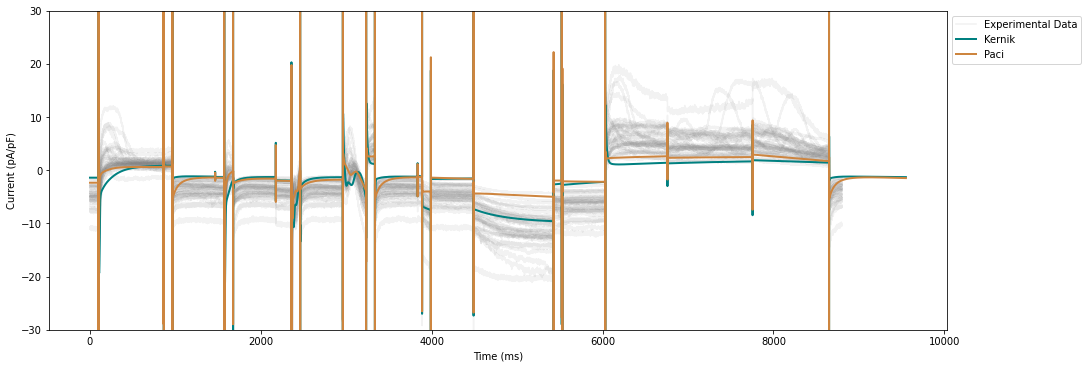

In [11]:
# Plot Current Data
fig, axs = plt.subplots(1, figsize = (15, 5), constrained_layout = True)

for i in range(0, int(max(all_cells['cell']))):
    if i == 0:
        axs.plot((np.array(all_cells[all_cells['cell'] == i]['Time (s)'])*1000), np.array(all_cells[all_cells['cell'] == i]['Current (pA/pF)']), color = 'gray', alpha = 0.1, label = 'Experimental Data')
    else:
        axs.plot((np.array(all_cells[all_cells['cell'] == i]['Time (s)'])*1000), np.array(all_cells[all_cells['cell'] == i]['Current (pA/pF)']), color = 'gray', alpha = 0.1)

axs.plot(t_kernik_vcp, i_out_kernik, label = 'Kernik', color = 'teal', alpha = 1, linewidth = 2)
axs.plot(t_paci_vcp, i_out_paci, label = 'Paci', color = 'peru', alpha = 1, linewidth = 2)

axs.set_ylim([-30, 30])
axs.set_xlabel('Time (ms)')
axs.set_ylabel('Current (pA/pF)')
axs.legend(bbox_to_anchor = (1,1))